In [11]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [12]:
#the location of the data file
filepath = '/home/lamontano/Desktop/Capstone2/SPT-100-Fig6Data_PressureVsTrust.csv'
#import the data
data = pd.read_csv(filepath)

In [13]:
X = data.iloc[:, 1:2].values
Y = data.iloc[:,1:2].values
print(data.head)

<bound method NDFrame.head of    Thurst (Nm)  Pressure (Torr)
0    80.064428         0.000004
1    80.128792         0.000005
2    81.499257         0.000008
3    82.544377         0.000014
4    82.645756         0.000022
5    83.104613         0.000042
6    83.034885         0.000061>


In [14]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,  test_size = 0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5, 1) (5, 1)
(2, 1) (2, 1)


In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

LR = LinearRegression()
model = LR.fit(X_train, Y_train)
y_predictions = LR.predict(X_test)

In [16]:
print(model.score(X_test,Y_test))


0.46343389154034


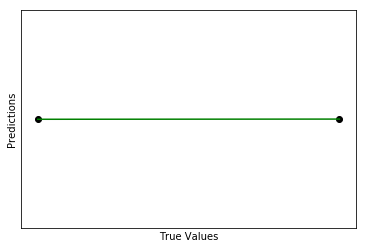

In [17]:
# Plot Linear Regression
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_predictions, color='green')

plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

In [18]:
kf = KFold(n_splits = 2)
kf.get_n_splits(X)
print(kf)

KFold(n_splits = 2, random_state = None, shuffle = True)

for train_index, test_index in kf.split(X):
    #print("Train: ", train_index, "Test: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
score = cross_val_score(LinearRegression(), X_test, Y_test, cv = 2)

print('Cross-validated scores: ', score)

KFold(n_splits=2, random_state=None, shuffle=False)
Cross-validated scores:  [-8.40240896         nan]


/home/lamontano/.local/lib/python3.5/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


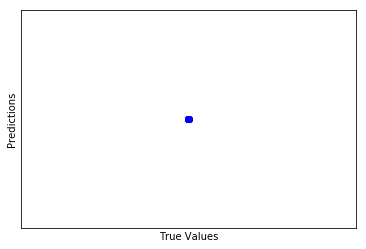

In [19]:
#Make cross validation predictions 
predictions = cross_val_predict(LinearRegression(),X, Y, cv = 2)
plt.scatter(X, Y,  color='green')
plt.scatter(Y,predictions, color = 'blue' )
plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [20]:
accuracy = metrics.r2_score(Y, predictions)
print('Cross-Predicted Accuracy: ', accuracy)

Cross-Predicted Accuracy:  1.0
